[![Open In Colab](images/colab-badge.svg)](https://colab.research.google.com/github/spalkovits/REAKT2019_ML4OER_SPks/blob/master/REAKT2019_ML4OER_SPks.ipynb)

An online version of this talk can be found on Github:

**https://github.com/spalkovits/REAKT2019_ML4OER_SPks/blob/master/REAKT2019_ML4OER_SPks.ipynb**

If you like to follow along this talk click the colab button above. It works best when you choose open in new tab.

---
<center><img src="images/RWTH.jpg" width=600></center>

<h1 align="center"> Machine learning approaches for the prediction of oxygen evolution catalysts. </h1> 
<h1 align="center"> Dr. Stefan Palkovits </h1>
<h1 align="center"> <a href="stefan.palkovits@itmc.rwth-aachen.de">stefan.palkovits@itmc.rwth-aachen.de </a> </h1>

---

<center><img src="images/CZwBnptVIAAxglE.jpg" width=600></center>

source: https://pbs.twimg.com/media/CZwBnptVIAAxglE.jpg

<center><img src="images/Emerging-Technology-Hype-Cycle-for-2017_Infographic_R6A.jpg" width=800></center>

source: https://blogs.gartner.com/smarterwithgartner/files/2017/08/Emerging-Technology-Hype-Cycle-for-2017_Infographic_R6A.jpg

<center><img src="images/machine_learning_2x.png" width=600></center>

source: https://xkcd.com/1838/

<center><img src="images/kisspng-deep-learning-machine-learning-artificial-intellig-segmentation-5add57a3429e59.6693846415244553312729.png" width=900></center>

source: https://de.kisspng.com/png-ubowb3/

<center><img src="images/network.png" width=450></center>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
url_full = 'https://raw.githubusercontent.com/spalkovits/ML_NiFeCoCe_talk/master/full_dataset.csv'
url_own = 'https://raw.githubusercontent.com/spalkovits/ML_NiFeCoCe_talk/master/own_dataset.csv'

In [3]:
NiFeCoCe_full = np.genfromtxt(url_full, skip_header=1, delimiter=',')
NiFeCoCe_own = np.genfromtxt(url_own, skip_header=1, delimiter=',')

In [4]:
df_full = pd.read_csv(url_full)

In [5]:
df_full.head()

,Ni,Fe,Co,Ce,Overpotential
0,1.000,0.000,0.000,0.0,441.0
1,0.969,0.031,0.000,0.0,426.0
2,0.969,0.000,0.031,0.0,423.0
3,0.929,0.071,0.000,0.0,420.0
4,0.929,0.031,0.031,0.0,422.0


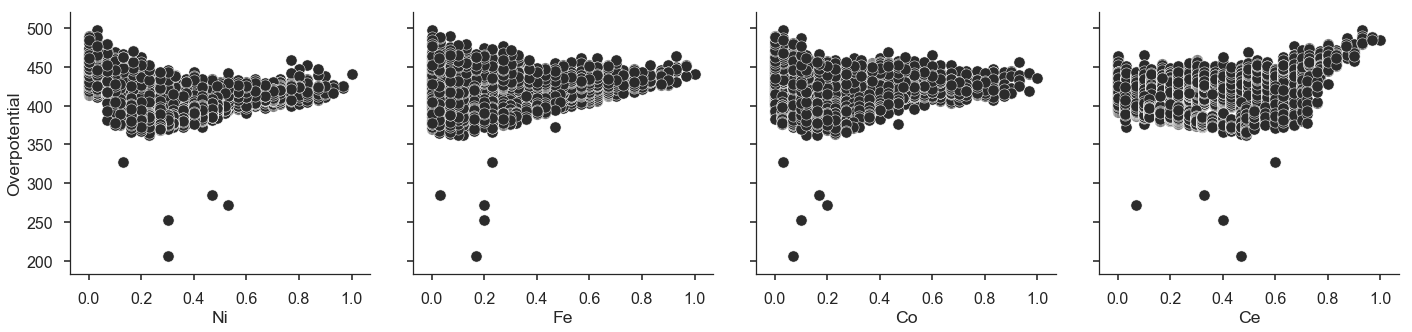

In [6]:
sns.set()
sns.set(style='ticks', context='poster', palette='Greys_r')

sns.pairplot(df_full, size=5, x_vars=['Ni', 'Fe', 'Co', 'Ce'], y_vars=['Overpotential'], markers='o');

In [7]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

k_ellbow = []

for E in range(20):
    E = E+1
    kmeans = KMeans(n_clusters=E)
    kmeans.fit(NiFeCoCe_full[:,0:4])
    score = kmeans.score(NiFeCoCe_full[:,0:4])
    k_ellbow.append(score)

k_cluster = KMeans(n_clusters=10)
k_cluster.fit(NiFeCoCe_full[:,0:4])
y_k_cluster = k_cluster.predict(NiFeCoCe_full[:,0:4])

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, init='pca')
tsne_result = tsne.fit_transform(NiFeCoCe_full[:,0:4])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6074 samples in 0.002s...
[t-SNE] Computed neighbors for 6074 samples in 0.121s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6074
[t-SNE] Computed conditional probabilities for sample 2000 / 6074
[t-SNE] Computed conditional probabilities for sample 3000 / 6074
[t-SNE] Computed conditional probabilities for sample 4000 / 6074
[t-SNE] Computed conditional probabilities for sample 5000 / 6074
[t-SNE] Computed conditional probabilities for sample 6000 / 6074
[t-SNE] Computed conditional probabilities for sample 6074 / 6074
[t-SNE] Mean sigma: 0.044124
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.388191
[t-SNE] KL divergence after 1000 iterations: 1.350374


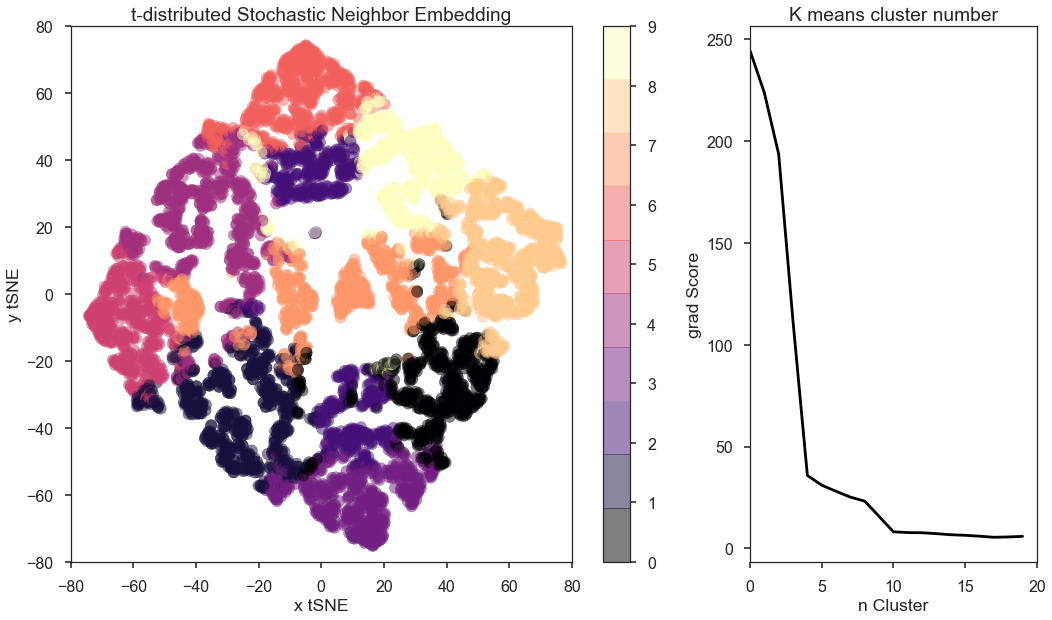

In [8]:
sns.set()
sns.set(style='ticks', context='poster')
plt.figure(figsize=(15,9))
grid = plt.GridSpec(1,3)
plt.subplot(grid[0,:2])
plt.xlim((-80,80))
plt.ylim((-80,80))

plt.title('t-distributed Stochastic Neighbor Embedding')
plt.xlabel('x tSNE')
plt.ylabel('y tSNE')

plt.scatter(tsne_result[:,0], tsne_result[:,1], c=y_k_cluster, marker='o',alpha=0.5, cmap=plt.cm.get_cmap('magma', 10))
plt.colorbar(ticks=np.arange(0,12))

plt.subplot(grid[0,2])
plt.xlim(0, 20)
plt.title('K means cluster number')
plt.xlabel('n Cluster')
plt.ylabel('grad Score')
plt.plot(np.gradient(k_ellbow), 'k')

plt.tight_layout();

In [9]:
print(NiFeCoCe_full[0:5,:])
new_order = np.argsort(NiFeCoCe_full[:,-1])
print('---')
NiFeCoCe_new = NiFeCoCe_full[new_order]
print(NiFeCoCe_new)
print('---')
NiFeCoCe_small_OP = NiFeCoCe_new[NiFeCoCe_new[:,-1]<380]
NiFeCoCe_large_OP = NiFeCoCe_new[NiFeCoCe_new[:,-1]>=380]
print(NiFeCoCe_small_OP.shape)
print(NiFeCoCe_large_OP.shape)

[[1.00e+00 0.00e+00 0.00e+00 0.00e+00 4.41e+02]
 [9.69e-01 3.10e-02 0.00e+00 0.00e+00 4.26e+02]
 [9.69e-01 0.00e+00 3.10e-02 0.00e+00 4.23e+02]
 [9.29e-01 7.10e-02 0.00e+00 0.00e+00 4.20e+02]
 [9.29e-01 3.10e-02 3.10e-02 0.00e+00 4.22e+02]]
---
[[3.02e-01 1.69e-01 7.10e-02 4.71e-01 2.06e+02]
 [3.02e-01 2.00e-01 1.02e-01 4.00e-01 2.52e+02]
 [5.29e-01 2.00e-01 2.00e-01 7.10e-02 2.72e+02]
 ...
 [0.00e+00 3.10e-02 0.00e+00 9.69e-01 4.89e+02]
 [0.00e+00 7.10e-02 0.00e+00 9.29e-01 4.90e+02]
 [3.10e-02 0.00e+00 3.10e-02 9.29e-01 4.98e+02]]
---
(146, 5)
(5928, 5)


In [10]:
print(NiFeCoCe_small_OP.shape)
print(NiFeCoCe_large_OP.shape)

(146, 5)
(5928, 5)


In [11]:
from sklearn.model_selection import train_test_split

X1_train, y1_test = train_test_split(NiFeCoCe_large_OP, test_size=0.3, random_state=42)
X2_train, y2_test = train_test_split(NiFeCoCe_small_OP, test_size=0.3, random_state=42)

print('---')
print(X1_train.shape, X2_train.shape)
print('---')
print(y1_test.shape, y2_test.shape)
print('---')

NiFeCoCe_train = np.vstack((X1_train, X2_train))
NiFeCoCe_test = np.vstack((y1_test, y2_test))

print(NiFeCoCe_train.shape)
print(NiFeCoCe_test.shape)

---
(4149, 5) (102, 5)
---
(1779, 5) (44, 5)
---
(4251, 5)
(1823, 5)


In [12]:
np.random.seed(42)

order1 = np.argsort(np.random.random(NiFeCoCe_train[:,-1].shape))
order2 = np.argsort(np.random.random(NiFeCoCe_test[:,-1].shape))

NiFeCoCe_train = NiFeCoCe_train[order1]
NiFeCoCe_test = NiFeCoCe_test[order2]

In [13]:
train_data = NiFeCoCe_train[:,0:4]

train_label = NiFeCoCe_train[:,-1]/1000

test_data = NiFeCoCe_test[:,0:4]

test_label = NiFeCoCe_test[:,-1]/1000

In [14]:
print(train_data.shape)
print(train_label.shape)
print('---')
print(test_data.shape)
print(test_label.shape)

(4251, 4)
(4251,)
---
(1823, 4)
(1823,)


In [15]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error

#print('Tensorflow version: ' + tf.__version__)

/Users/palkovits/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [16]:
%%time

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

model = keras.Sequential()
model.add(keras.layers.Dense(6, activation=tf.nn.relu, input_shape=(train_data.shape[1],)))
model.add(keras.layers.Dense(6, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))
    
optimizer = tf.keras.optimizers.RMSprop(lr=0.001)
    
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    
model.summary()
    
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

model.fit(train_data, train_label, epochs=500, validation_split=0.2, verbose=0, callbacks=[early_stop]);

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________
CPU times: user 53.2 s, sys: 5.59 s, total: 58.7 s
Wall time: 26.7 s


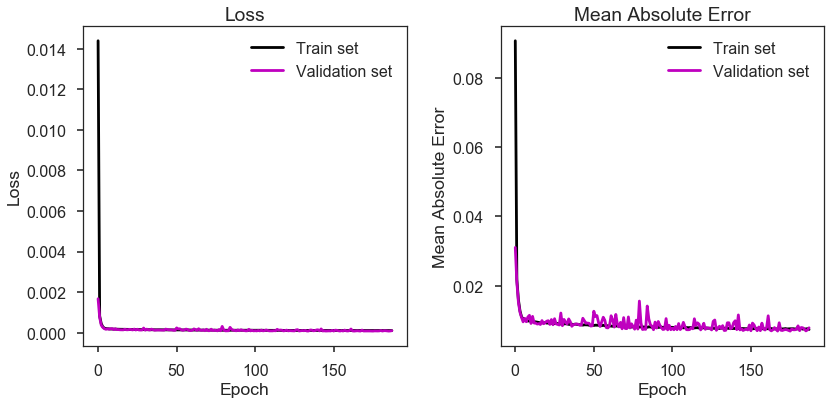

In [17]:
sns.set()
sns.set(style='ticks', context='poster', palette='magma')
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(model.history.epoch, np.array(model.history.history['loss']), 'k',label='Train set')
plt.plot(model.history.epoch, np.array(model.history.history['val_loss']), 'm', label='Validation set')
plt.legend()

plt.subplot(122)
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(model.history.epoch, np.array(model.history.history['mean_absolute_error']), 'k', label='Train set')
plt.plot(model.history.epoch, np.array(model.history.history['val_mean_absolute_error']), 'm', label='Validation set')
plt.legend()
         
plt.tight_layout()

In [18]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=10, gamma=10, epsilon=0.001)
y_svr = svr_rbf.fit(train_data, train_label)

In [19]:
from sklearn import neighbors

model_knn = neighbors.KNeighborsRegressor(n_neighbors = 11)
model_knn.fit(train_data, train_label)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=11, p=2,
          weights='uniform')

In [20]:
train_predictions = model.predict(train_data).flatten()
test_predictions = model.predict(test_data).flatten()

predict_own_data = model.predict(NiFeCoCe_own[:,0:4]).flatten()

In [21]:
predict_svr_train = y_svr.predict(train_data)
predict_svr = y_svr.predict(test_data)

predict_own_svr = y_svr.predict(NiFeCoCe_own[:,0:4])

In [22]:
predict_knn_train=model_knn.predict(train_data)
predict_knn=model_knn.predict(test_data)

predict_own_knn=model_knn.predict(NiFeCoCe_own[:,0:4])

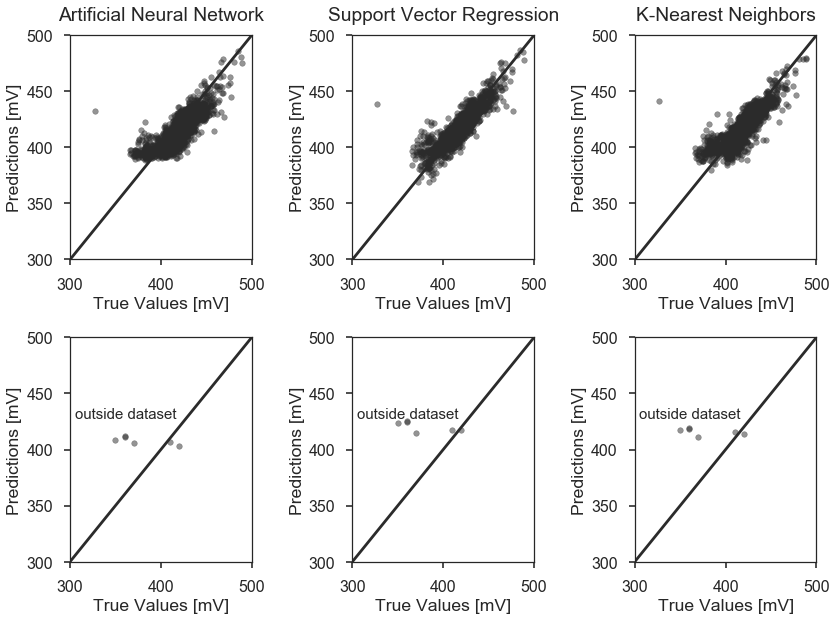

In [23]:
sns.set()
sns.set(style='ticks', context='poster', palette='Greys_r')
plt.figure(figsize=(12,9))

plt.subplot(231)
plt.xlim((300,500))
plt.ylim((300,500))
plt.title('Artificial Neural Network', pad=15)
plt.xlabel('True Values [mV]')
plt.ylabel('Predictions [mV]')
plt.scatter(test_label*1000, test_predictions*1000, marker='.', alpha=0.5)
plt.plot([-1000, 1000], [-1000, 1000])

plt.subplot(232)
plt.xlim((300,500))
plt.ylim((300,500))
plt.title('Support Vector Regression', pad=15)
plt.xlabel('True Values [mV]')
plt.ylabel('Predictions [mV]')
plt.scatter(test_label*1000, predict_svr*1000, marker='.', alpha=0.5)
plt.plot([-1000, 1000], [-1000, 1000])

plt.subplot(233)
plt.xlim((300,500))
plt.ylim((300,500))
plt.title('K-Nearest Neighbors', pad=15)
plt.xlabel('True Values [mV]')
plt.ylabel('Predictions [mV]')
plt.scatter(test_label*1000, predict_knn*1000, marker='.', alpha=0.5)

plt.plot([-1000, 1000], [-1000, 1000])

plt.subplot(234)
plt.xlim((300,500))
plt.ylim((300,500))
plt.xlabel('True Values [mV]')
plt.ylabel('Predictions [mV]')
plt.scatter(NiFeCoCe_own[:,-1], predict_own_data*1000, marker='.', alpha=0.5)
plt.annotate('outside dataset', xy=(305,428), size=15)
plt.plot([-1000, 1000], [-1000, 1000])

plt.subplot(235)
plt.xlim((300,500))
plt.ylim((300,500))
plt.xlabel('True Values [mV]')
plt.ylabel('Predictions [mV]')
plt.scatter(NiFeCoCe_own[:,-1], predict_own_svr*1000, marker='.', alpha=0.5)
plt.annotate('outside dataset', xy=(305,428), size=15)
plt.plot([-1000, 1000], [-1000, 1000])

plt.subplot(236)
plt.xlim((300,500))
plt.ylim((300,500))
plt.xlabel('True Values [mV]')
plt.ylabel('Predictions [mV]')
plt.scatter(NiFeCoCe_own[:,-1], predict_own_knn*1000, marker='.', alpha=0.5)
plt.annotate('outside dataset', xy=(305,428), size=15)
plt.plot([-1000, 1000], [-1000, 1000])

plt.tight_layout()

In [24]:
mse_ann = mean_squared_error(test_label,test_predictions)
mse_ann_train = mean_squared_error(train_label,train_predictions)

mse_svr = mean_squared_error(test_label,predict_svr)
mse_svr_train = mean_squared_error(train_label,predict_svr_train)

mse_knn = mean_squared_error(test_label,predict_knn)
mse_knn_train = mean_squared_error(train_label,predict_knn_train)

from sklearn.metrics import r2_score

r2_ann_train = r2_score(train_label,train_predictions)
r2_ann = r2_score(test_label,test_predictions)

r2_svr_train = r2_score(train_label,predict_svr_train)
r2_svr = r2_score(test_label,predict_svr)

r2_knn_train = r2_score(train_label,predict_knn_train)
r2_knn = r2_score(test_label,predict_knn)

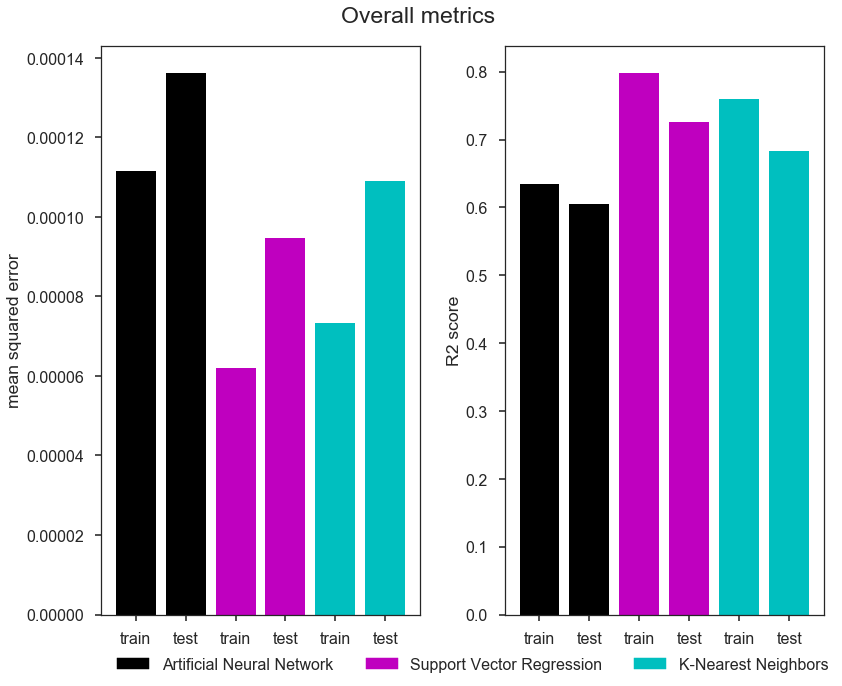

In [25]:
import matplotlib.patches as mpatches

sns.set()
sns.set(style='ticks', context='poster', palette='magma')

ann = mpatches.Patch(color='k', label='Artificial Neural Network')
svr = mpatches.Patch(color='m', label='Support Vector Regression')
knn = mpatches.Patch(color='c', label='K-Nearest Neighbors')

names = ['train', 'test', 'train', 'test', 'train', 'test']
pos = range(len(names))
colors = ['k', 'k', 'm', 'm', 'c', 'c']
rotation = 0

plt.figure(figsize=(12,9))
plt.suptitle('Overall metrics', y=1.02)
plt.subplot(121)
plt.bar(pos, [mse_ann_train, mse_ann, mse_svr_train, mse_svr,mse_knn_train, mse_knn], color=colors)
plt.xticks(pos, names,rotation=rotation)
plt.ylabel('mean squared error')

plt.subplot(122)
plt.bar(pos, [r2_ann_train,r2_ann, r2_svr_train, r2_svr,r2_knn_train, r2_knn], color=colors)
plt.xticks(pos, names, rotation=rotation)
plt.ylabel('R2 score')

plt.tight_layout()
plt.legend(loc='upper center', handles=[ann, svr, knn], ncol=3, bbox_to_anchor=(-0.1, -0.05));

In [26]:
print(r2_ann_train)
print(r2_ann)

print(r2_svr_train)
print(r2_svr)

print(r2_knn_train)
print(r2_knn)

0.6349922927141728
0.6049709544973033
0.7977090975950708
0.7255718846318567
0.7604278315638664
0.6835628820966368
